 Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples 
and 14 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features.

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
bos = load_boston()
bos.feature_names

# dt = pd.read_csv("https://raw.githubusercontent.com/pyANSH/dsbda/main/dataset/boston_p4.csv")
dt = pd.DataFrame(bos.data)
dt.columns = bos.feature_names

C:\Users\ayans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
dt.head()
dt['PRICE'] = bos.target

In [4]:
dt.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<AxesSubplot:>

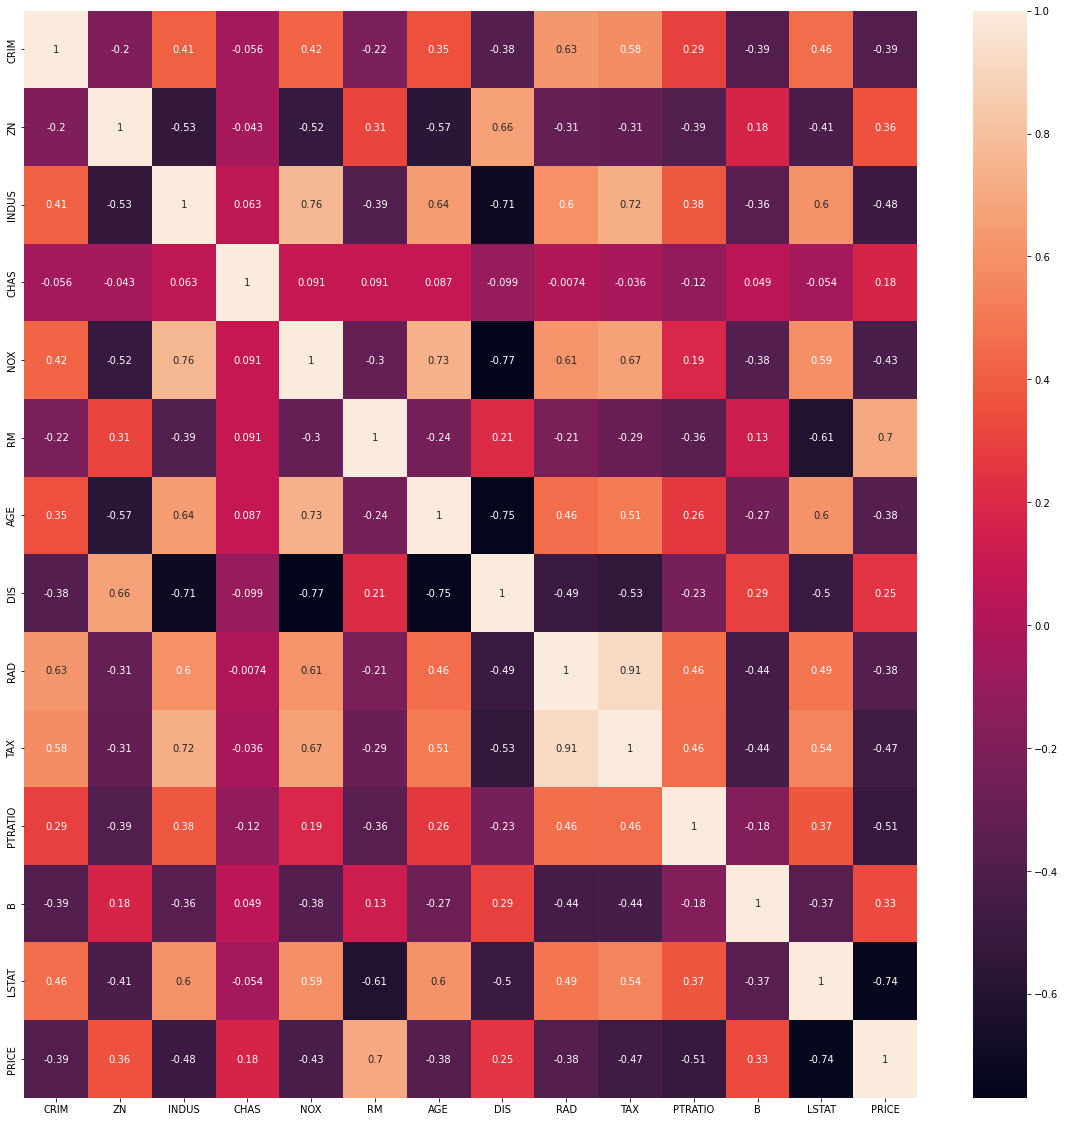

In [5]:
from matplotlib.pyplot import figure
figure(figsize = (20,20))
sn.heatmap(dt.corr(), annot = True)

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

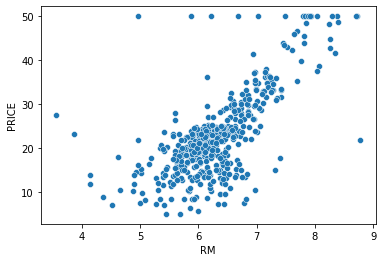

In [6]:
sn.scatterplot(x='RM', y='PRICE', data = dt)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = bos.data
y = bos.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

In [8]:
lr= LinearRegression()

In [9]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

C:\Users\ayans\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

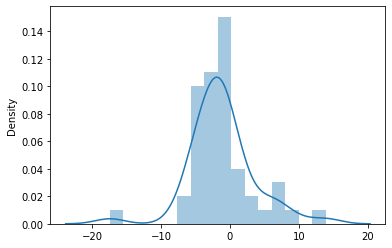

In [10]:
sn.distplot((y_test-pred))

In [11]:
from sklearn import metrics 


np.sqrt(metrics.mean_squared_error(y_test, pred))

4.79181030839196

In [12]:
metrics.r2_score(y_test, pred)

0.6925949796632875

In [1]:
# cr = metrics.classification_report(y_test,pred)